In [1]:
%matplotlib inline
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

plt.style.use("seaborn-talk")

In [2]:
plt.style.use("seaborn")
#plt.style.available

In [3]:
# features_predictoras=features_x
# features_criterio=features_y
# predict_name=y_list[22] #17-25

params = {'n_estimators': 300,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

def feature_importance(features_predictoras,features_criterio,predict_name, view_plot=True):

    X_train, X_test, y_train, y_test = train_test_split(
        features_predictoras, 
        features_criterio[predict_name],
        test_size=0.25, 
        random_state=183)

    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    result = permutation_importance(reg, X_test, y_test, n_repeats=250,
                                    random_state=183, n_jobs=-1)
    if view_plot:
        sorted_idx = result.importances_mean.argsort()
        sorted_idx = sorted_idx[-15:]
        plt.figure(figsize=(8, 8))
        plt.boxplot(result.importances[sorted_idx].T,
                    vert=False, labels=np.array(features.columns)[sorted_idx])

        plt.title("Permutation Importance (test set) "+predict_name)

    return pd.DataFrame({predict_name+"_importance_mean":result.importances_mean}, index=features_x.columns)

In [4]:
# datos=pd.read_csv("datos_preprocesados.csv", index_col=0)
datos=pd.read_csv("datos_out_punts.csv", index_col=0)

In [5]:
datos.ebc_fecha=pd.to_datetime(datos.ebc_fecha)

In [6]:
y_list=["ebc_humor", "ebc_relax","ebc_energia", "ebc_levantado","ebc_interesantes",#4
        "ebc_nervioso","ebc_preocupacion","ebc_tranquilo", "ebc_desagradable", "ebc_inquieto", "ebc_temor",#10
        "escala_bienestar","escala_HADS",'centil_bienestar','centil_HADS', 'z_bienestar', 'z_HADS',#16
        "discret_bienestar","discret_HADS", 'flag_bienestar_z','flag_HADS_z', #20
        'flag_bienestar', 'flag_HADS',"flag_discret", "flag_z", #24
        'flag_warning']#25

In [7]:
datos_x=datos.drop(y_list,axis="columns")
datos_y=datos[y_list]
print(datos_x.columns)
print(datos_y.columns)

Index(['ebc_dirip', 'ebc_genero', 'ebc_anios', 'ebc_neducativo',
       'ebc_socupacional', 'ebc_hortrabajo', 'ebc_horestudio',
       'ebc_perdioempleo', 'ebc_expuestoempleo', 'ebc_epareja', 'ebc_ninos',
       'ebc_cuantosninos', 'ebc_adultos', 'ebc_cuantosadultos',
       'ebc_situacion_0', 'ebc_animo', 'ebc_agresivo', 'ebc_r_viven',
       'ebc_r_noviven', 'ebc_ruttrabajo', 'ebc_actfisica', 'ebc_actlectura',
       'ebc_actrecreacion', 'ebc_actotra', 'ebc_cual_rut', 'ebc_habilidad',
       'ebc_cualhabilidad', 'ebc_aprendio', 'ebc_queaprendio', 'ebc_bebia',
       'ebc_alcohol', 'ebc_fumaba', 'ebc_tabaco', 'ebc_consumiaspa', 'ebc_spa',
       'ebc_pal_futuro_1', 'ebc_pal_futuro_2', 'ebc_pal_futuro_3',
       'ebc_pal_futuro_4', 'ebc_pal_futuro_5', 'ebc_pal_futuro_6',
       'ebc_pal_futuro_7', 'ebc_susfinanzas', 'ebc_susfinanzas1',
       'ebc_sueducacion', 'ebc_sueducacion1', 'ebc_educashijos',
       'ebc_educashijos1', 'ebc_susalud', 'ebc_susalud1', 'ebc_sufamilia',
       'ebc_

In [8]:
features=pd.read_csv("features_normalized.csv", index_col=0)

In [9]:
features_x=features.drop(y_list,axis="columns")
features_y=features[y_list]
print(features_x.columns)
print(features_y.columns)

Index(['ebc_genero_Hombre', 'ebc_genero_Mujer', 'ebc_genero_Otro',
       'ebc_neducativo_postgrado', 'ebc_neducativo_primaria',
       'ebc_neducativo_secundaria', 'ebc_neducativo_universidad',
       'ebc_socupacional_Estudiante, no trabajo.',
       'ebc_socupacional_Estudio y trabajo.',
       'ebc_socupacional_Jubilación o pensión',
       'ebc_socupacional_No tengo empleo y no estoy buscando.',
       'ebc_socupacional_No tengo empleo, pero estoy buscando.',
       'ebc_socupacional_No trabajo por discapacidad.',
       'ebc_socupacional_Normalmente trabajo en casa.',
       'ebc_socupacional_Trabajo tiempo completo.',
       'ebc_socupacional_Trabajo tiempo parcial.', 'ebc_hortrabajo_0- 2 Horas',
       'ebc_hortrabajo_3 - 5 Horas', 'ebc_hortrabajo_5 - 8 Horas',
       'ebc_hortrabajo_8 - Más horas', 'ebc_horestudio_0- 2 Horas',
       'ebc_horestudio_3 - 5 Horas', 'ebc_horestudio_5 - 8 Horas',
       'ebc_horestudio_8 - Más horas', 'ebc_perdioempleo_Si',
       'ebc_perdioemple

In [10]:
# flag_bienestar=((datos.z_bienestar<-1)&(datos.discret_bienestar==1))*1
# flag_HADS=((datos.z_HADS>1)&(datos.discret_HADS==1))*1
# flag_warning=(flag_bienestar&flag_HADS)*1

# flag_bienestar_z=(datos.z_bienestar<-1)*1
# flag_HADS_z=(datos.z_HADS>1)*1
# flag_warning_z=(flag_bienestar_z&flag_HADS_z)*1

# flag_discret=((datos.discret_bienestar)&(datos.discret_HADS==1))*1

In [11]:
# pd.crosstab(index=flag_warning_z,columns=flag_discret, margins=True)

In [12]:
# datos_y=pd.concat([datos[y_list],
#                    pd.DataFrame({"flag_bienestar":flag_bienestar,
#                                  "flag_HADS":flag_HADS,
#                                  "flag_discret":flag_discret,
#                                  "flag_warning":flag_warning})], axis="columns")

# features_y=pd.concat([features[y_list],
#                       pd.DataFrame({"flag_bienestar":flag_bienestar,
#                                     "flag_HADS":flag_HADS,
#                                     "flag_discret":flag_discret,
#                                     "flag_warning":flag_warning})], axis="columns")

In [13]:
pairs_statests=pd.read_csv("pruebas_variables_test.csv", index_col=0)
pairs_statests.sample(15)

,var_1,var_1_tipo,prueba,var_2,var_2_tipo,p_val,relac
291,ebc_socupacional,politomica,ANOVA,ebc_interesantes,likert,5.746218e-10,si
102,ebc_anios,numerica,Prueba T,ebc_habilidad,dicotomica,5.682532e-02,no
633,ebc_epareja,politomica,chisquare,ebc_actotra,dicotomica,3.900728e-01,no
1142,ebc_agresivo,likert,Prueba T,ebc_educacion,dicotomica,4.211699e-04,si
2523,ebc_sufamilia,likert,Prueba T,ebc_situacion_3,dicotomica,3.928536e-01,no
1957,ebc_spa,politomica,ANOVA,ebc_supais,likert,4.291283e-01,no
1235,ebc_r_viven,likert,Prueba T,flag_HADS_z,dicotomica,1.450528e-08,si
3046,ebc_tranquilo,likert,Pearson,ebc_inquieto,likert,2.023661e-81,si
1767,ebc_bebia,dicotomica,Prueba T,escala_HADS,numerica,2.330813e-01,no
3165,ebc_situacion_2,dicotomica,chisquare,flag_HADS,dicotomica,4.986738e-04,si


In [14]:
var_name="ebc_epareja"
pairs_statests[(pairs_statests.relac=="si")&
               ((pairs_statests.var_1==var_name)|(pairs_statests.var_2==var_name))&
               (pairs_statests.var_1.isin(y_list)|pairs_statests.var_2.isin(y_list))].sort_values("p_val")

,var_1,var_1_tipo,prueba,var_2,var_2_tipo,p_val,relac
664,ebc_epareja,politomica,ANOVA,ebc_energia,likert,0.000034,si
666,ebc_epareja,politomica,ANOVA,ebc_interesantes,likert,0.000524,si
678,ebc_epareja,politomica,ANOVA,escala_bienestar,numerica,0.000723,si
683,ebc_epareja,politomica,ANOVA,z_bienestar,numerica,0.000805,si
682,ebc_epareja,politomica,ANOVA,centil_bienestar,numerica,0.002290,si
665,ebc_epareja,politomica,ANOVA,ebc_levantado,likert,0.005871,si
669,ebc_epareja,politomica,ANOVA,ebc_tranquilo,likert,0.007806,si
691,ebc_epareja,politomica,chisquare,flag_discret,dicotomica,0.012791,si
662,ebc_epareja,politomica,ANOVA,ebc_humor,likert,0.029910,si
671,ebc_epareja,politomica,ANOVA,ebc_inquieto,likert,0.040173,si


## Matriz de variables

In [15]:
variables_correlaciones=(features.corr().loc[features_x.columns,features_y.columns]).abs()

In [16]:
variables_correlaciones

,ebc_humor,ebc_relax,ebc_energia,ebc_levantado,ebc_interesantes,ebc_nervioso,ebc_preocupacion,ebc_tranquilo,ebc_desagradable,ebc_inquieto,...,z_HADS,discret_bienestar,discret_HADS,flag_bienestar_z,flag_HADS_z,flag_bienestar,flag_HADS,flag_discret,flag_z,flag_warning
ebc_genero_Hombre,0.076802,0.110454,0.126077,0.111096,0.058770,0.136055,0.099526,0.036591,0.083491,0.004021,...,0.096597,0.088254,0.076575,0.051413,0.035317,0.051413,0.035317,0.084455,0.030748,0.030748
ebc_genero_Mujer,0.070980,0.106517,0.123481,0.110921,0.059089,0.132839,0.099750,0.037064,0.082368,0.009157,...,0.093682,0.083181,0.075646,0.049014,0.036377,0.049014,0.036377,0.084403,0.031432,0.031432
ebc_genero_Otro,0.020081,0.010099,0.003490,0.005864,0.004845,0.005522,0.006867,0.004179,0.000211,0.021980,...,0.006593,0.016227,0.000623,0.007098,0.006591,0.007098,0.006591,0.004801,0.004725,0.004725
ebc_neducativo_postgrado,0.054599,0.084184,0.079401,0.068952,0.111061,0.056545,0.055211,0.052731,0.022376,0.062814,...,0.069769,0.113434,0.063748,0.047525,0.004491,0.047525,0.004491,0.084592,0.015975,0.015975
ebc_neducativo_primaria,0.029148,0.011405,0.041877,0.029968,0.023862,0.017178,0.022071,0.001410,0.002159,0.014031,...,0.004931,0.053828,0.010292,0.003083,0.016802,0.003083,0.016802,0.022670,0.011250,0.011250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ebc_susalud,0.340843,0.359936,0.355653,0.321582,0.281131,0.317909,0.302152,0.271838,0.265928,0.202700,...,0.351949,0.331640,0.252352,0.268953,0.245607,0.268953,0.245607,0.322717,0.212228,0.212228
ebc_sufamilia,0.261939,0.236813,0.238039,0.211286,0.244201,0.145824,0.161656,0.207475,0.155339,0.116234,...,0.193538,0.234348,0.138596,0.215714,0.109966,0.215714,0.109966,0.179965,0.143070,0.143070
ebc_susamigos,0.192797,0.189762,0.225736,0.150514,0.200073,0.158692,0.159351,0.120674,0.129523,0.120597,...,0.177973,0.175595,0.141547,0.174648,0.107744,0.174648,0.107744,0.167502,0.127363,0.127363
ebc_suciudad,0.144457,0.168932,0.183355,0.143357,0.144799,0.178570,0.172050,0.098611,0.132621,0.093667,...,0.179324,0.191115,0.143409,0.100213,0.124576,0.100213,0.124576,0.184532,0.119898,0.119898


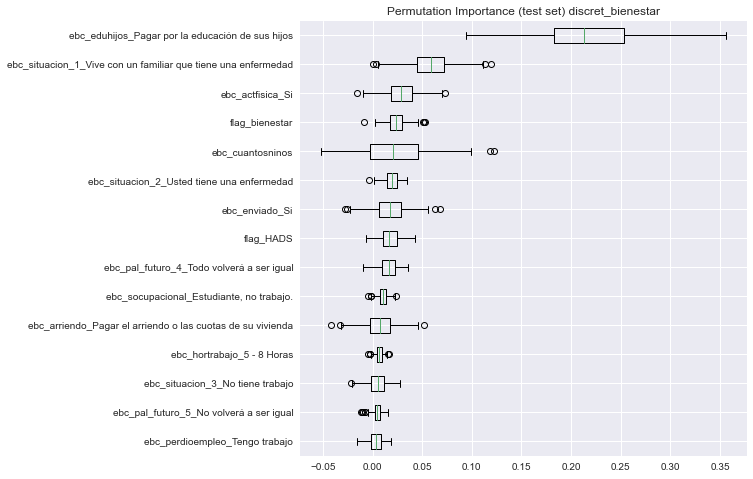

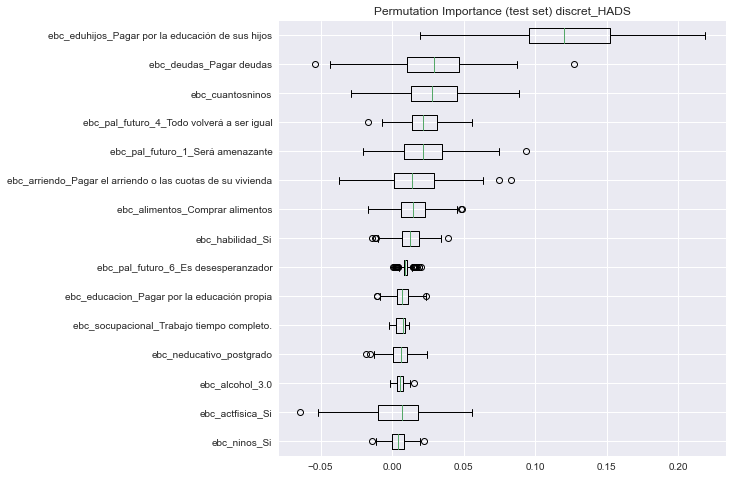

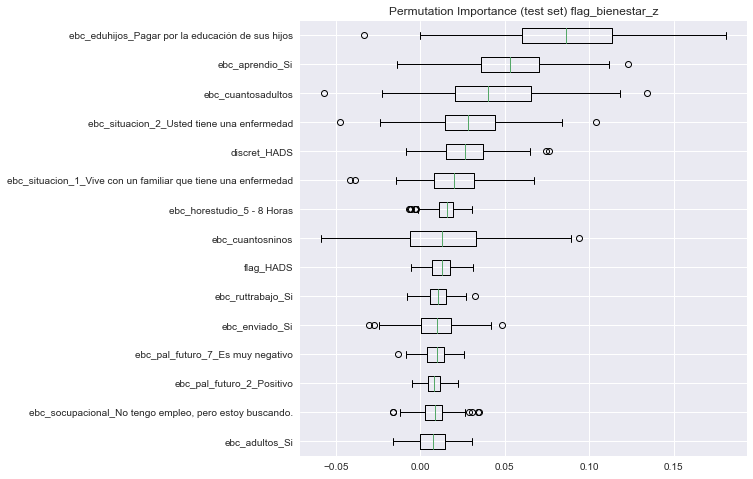

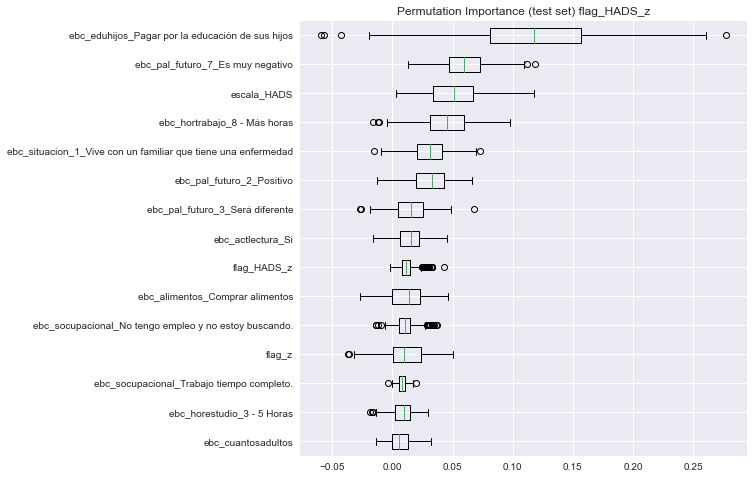

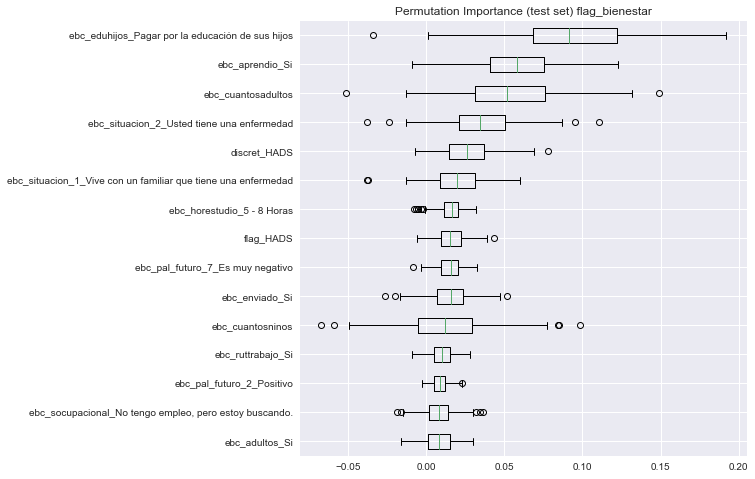

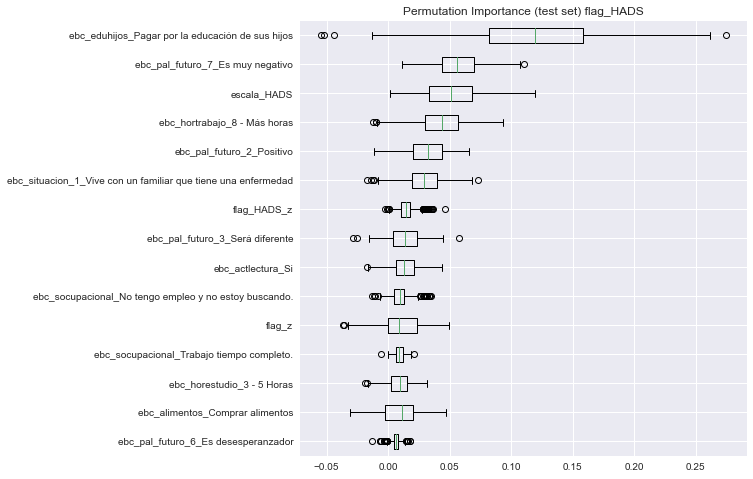

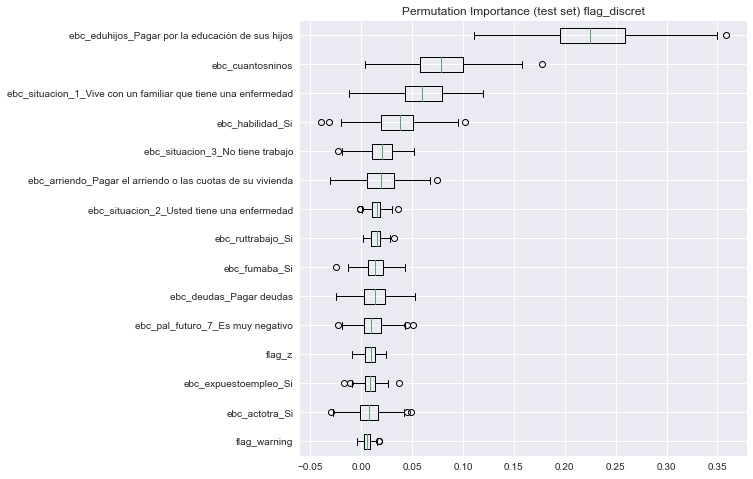

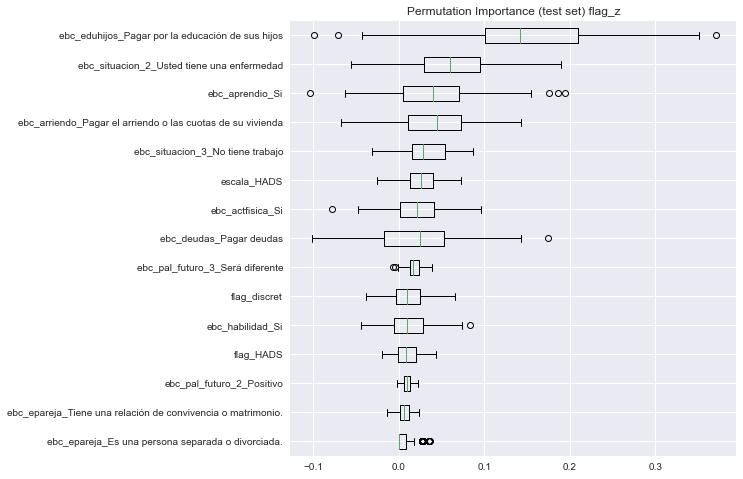

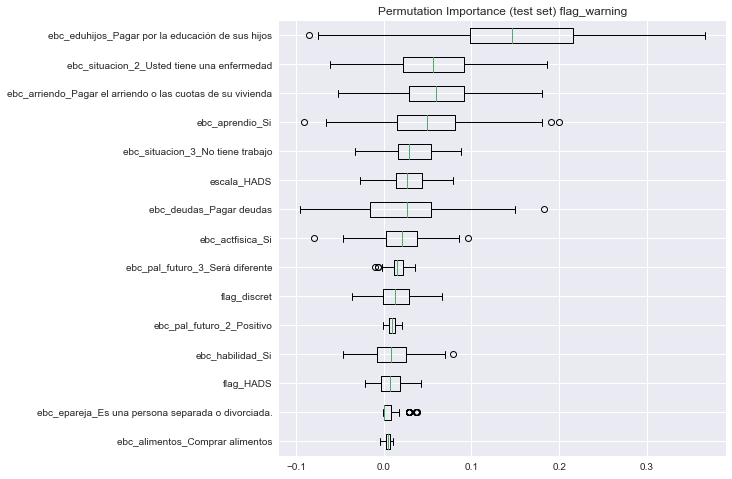

In [17]:
for i in range(17,26):
    variables_correlaciones=pd.concat([variables_correlaciones, feature_importance(features_x,features_y,y_list[i])], axis="columns")    

In [18]:
variables_correlaciones

,ebc_humor,ebc_relax,ebc_energia,ebc_levantado,ebc_interesantes,ebc_nervioso,ebc_preocupacion,ebc_tranquilo,ebc_desagradable,ebc_inquieto,...,flag_warning,discret_bienestar_importance_mean,discret_HADS_importance_mean,flag_bienestar_z_importance_mean,flag_HADS_z_importance_mean,flag_bienestar_importance_mean,flag_HADS_importance_mean,flag_discret_importance_mean,flag_z_importance_mean,flag_warning_importance_mean
ebc_genero_Hombre,0.076802,0.110454,0.126077,0.111096,0.058770,0.136055,0.099526,0.036591,0.083491,0.004021,...,0.030748,0.000044,-1.739447e-03,-2.867840e-04,0.000576,0.000258,0.001193,1.709905e-04,0.001792,0.002547
ebc_genero_Mujer,0.070980,0.106517,0.123481,0.110921,0.059089,0.132839,0.099750,0.037064,0.082368,0.009157,...,0.031432,-0.000115,-3.393858e-03,-2.209680e-03,-0.000706,-0.000803,-0.000147,-1.227205e-03,0.002847,0.001935
ebc_genero_Otro,0.020081,0.010099,0.003490,0.005864,0.004845,0.005522,0.006867,0.004179,0.000211,0.021980,...,0.004725,0.000003,1.711409e-05,3.707634e-04,-0.000013,0.000171,-0.000018,2.315055e-04,-0.000718,-0.001096
ebc_neducativo_postgrado,0.054599,0.084184,0.079401,0.068952,0.111061,0.056545,0.055211,0.052731,0.022376,0.062814,...,0.015975,-0.003872,5.500701e-03,2.900534e-04,0.002723,-0.000555,-0.000513,6.997676e-04,-0.002179,-0.003228
ebc_neducativo_primaria,0.029148,0.011405,0.041877,0.029968,0.023862,0.017178,0.022071,0.001410,0.002159,0.014031,...,0.011250,0.000313,6.611937e-07,1.100314e-07,0.000142,-0.000002,0.000143,2.273324e-08,-0.000004,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ebc_susalud,0.340843,0.359936,0.355653,0.321582,0.281131,0.317909,0.302152,0.271838,0.265928,0.202700,...,0.212228,0.022372,2.851302e-02,1.340847e-02,-0.008157,0.012419,-0.008289,7.931872e-02,-0.049000,-0.050950
ebc_sufamilia,0.261939,0.236813,0.238039,0.211286,0.244201,0.145824,0.161656,0.207475,0.155339,0.116234,...,0.143070,-0.001929,7.459174e-04,4.311706e-02,0.006515,0.053418,0.006023,-1.187118e-02,0.001743,-0.000429
ebc_susamigos,0.192797,0.189762,0.225736,0.150514,0.200073,0.158692,0.159351,0.120674,0.129523,0.120597,...,0.127363,-0.003156,-5.120931e-04,3.752636e-03,0.001729,-0.003809,-0.000860,-8.804327e-03,-0.004372,-0.006705
ebc_suciudad,0.144457,0.168932,0.183355,0.143357,0.144799,0.178570,0.172050,0.098611,0.132621,0.093667,...,0.119898,-0.004314,-1.790035e-03,-4.494769e-03,0.051200,-0.005004,0.050954,-1.798745e-03,0.026835,0.028102


In [19]:
variables_correlaciones.to_csv("variables_correlaciones_informativas.csv")

<AxesSubplot:xlabel='flag_discret', ylabel='flag_discret_importance_mean'>

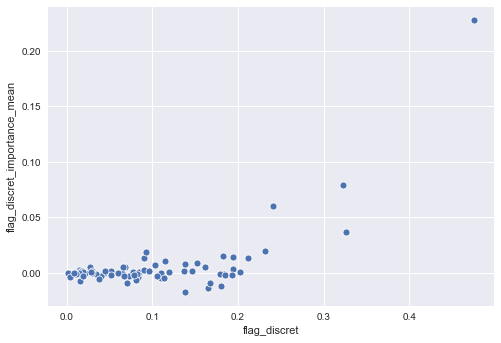

In [20]:
plt_values=variables_correlaciones.loc[:,variables_correlaciones.columns.str.contains(y_list[23], regex=True)]
sns.scatterplot(plt_values.iloc[:,0],plt_values.iloc[:,1])

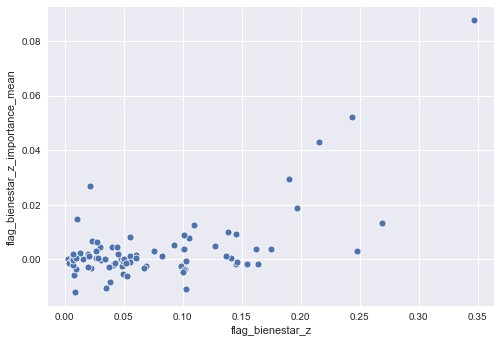

<AxesSubplot:xlabel='flag_bienestar', ylabel='flag_bienestar_importance_mean'>

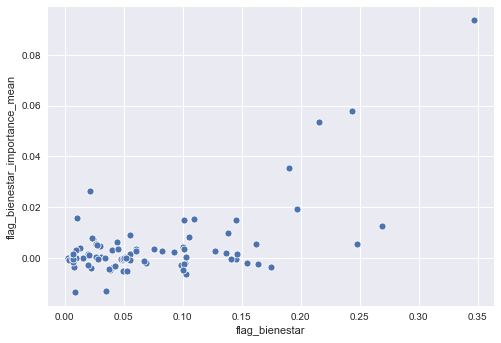

In [21]:
plt_values=variables_correlaciones.loc[:,variables_correlaciones.columns.str.contains(y_list[21], regex=True)]

sns.scatterplot(plt_values.iloc[:,0],plt_values.iloc[:,2])
plt.show()
sns.scatterplot(plt_values.iloc[:,1],plt_values.iloc[:,3])

In [22]:
salidas=[]
for var_criterio in features_y.columns[11:]:
    X_train, X_test, y_train, y_test = train_test_split(
        features_x, 
        features_y[var_criterio],
        test_size=0.25, 
        random_state=183)
    if len(features_y[var_criterio].value_counts())>2:
        reg = LinearRegression().fit(X_train, y_train)
        test_score=reg.score(X_test, y_test)
        salidas.append([var_criterio,"lineal","r2",test_score])
#         print (var_criterio,"lineal","r2",test_score)
    else:
        clf = LogisticRegression(random_state=183,max_iter=10000).fit(X_train, y_train)
        test_score=clf.score(X_test, y_test)
        salidas.append([var_criterio,"logística","mean_accuracy",test_score])
#         print (var_criterio,"logística","mean_accuracy",test_score)
    
    # [len(features_y[ft].value_counts())>2 for ft in features_y]

In [23]:
pd.DataFrame(salidas, columns=["Criterio", "Tipo_Regresión", "Métrica", "valor"])

,Criterio,Tipo_Regresión,Métrica,valor
0,escala_bienestar,lineal,r2,0.427116
1,escala_HADS,lineal,r2,0.329589
2,centil_bienestar,lineal,r2,0.429583
3,centil_HADS,lineal,r2,0.328197
4,z_bienestar,lineal,r2,0.427494
5,z_HADS,lineal,r2,0.329909
6,discret_bienestar,logística,mean_accuracy,0.761364
7,discret_HADS,logística,mean_accuracy,0.727273
8,flag_bienestar_z,logística,mean_accuracy,0.815909
9,flag_HADS_z,logística,mean_accuracy,0.854545


In [24]:
salidas_lineal=[]
for var_criterio in features_y.columns[17:]:
    X_train, X_test, y_train, y_test = train_test_split(
        features_x, 
        features_y[var_criterio],
        test_size=0.25, 
        random_state=183)

    reg = LinearRegression().fit(X_train, y_train)
    test_score=reg.score(X_test, y_test)
    salidas_lineal.append([var_criterio,"lineal","r2",test_score])
#     print (var_criterio,"r2",test_score)

In [25]:
pd.DataFrame(salidas_lineal, columns=["Criterio", "Tipo_Regresión", "Métrica", "valor"])

,Criterio,Tipo_Regresión,Métrica,valor
0,escala_bienestar,lineal,r2,0.427116
1,escala_HADS,lineal,r2,0.329589
2,centil_bienestar,lineal,r2,0.429583
3,centil_HADS,lineal,r2,0.328197
4,z_bienestar,lineal,r2,0.427494
5,z_HADS,lineal,r2,0.329909
6,discret_bienestar,lineal,r2,0.215659
7,discret_HADS,lineal,r2,0.204378
8,flag_bienestar_z,lineal,r2,0.118333
9,flag_HADS_z,lineal,r2,0.021893


In [26]:
pd.crosstab(features_y.flag_z, features_y.flag_warning)

flag_warning,0,1
flag_z,,
0,1647,0
1,0,112


* Incluir desempeño del boosting para las regresiones y contrastarlos

In [30]:
salidas_boosting=[]
for var_criterio in features_y.columns[17:]:
    X_train, X_test, y_train, y_test = train_test_split(
        features_x, 
        features_y[var_criterio],
        test_size=0.25, 
        random_state=183)
    grboost_clasif = ensemble.GradientBoostingClassifier(n_estimators= 300,
                                                        max_depth= 10,
                                                        min_samples_split= 5,
                                                        learning_rate= 0.01)
    grboost_clasif.fit(X_train, y_train)
    y_pred_grboost = grboost_clasif.predict(X_test)
    
    logreg_clasif = LogisticRegression(random_state=183,max_iter=10000).fit(X_train, y_train)
    y_pred_logreg = logreg_clasif.predict(X_test)
    
    print(var_criterio)
    print(pd.crosstab(y_test,y_pred))
    print("***********************")
    test_score_grboost=f1_score(y_test, y_pred_grboost, average='weighted')
    test_score_logreg=f1_score(y_test, y_pred_logreg, average='weighted')
    salidas_boosting.append([var_criterio,test_score_grboost,test_score_logreg])

discret_bienestar
col_0                0   1
discret_bienestar         
0                  130   1
1                  296  13
***********************
discret_HADS
col_0           0   1
discret_HADS         
0             165   0
1             261  14
***********************
flag_bienestar_z
col_0               0  1
flag_bienestar_z        
0                 359  6
1                  67  8
***********************
flag_HADS_z
col_0          0  1
flag_HADS_z        
0            376  6
1             50  8
***********************
flag_bienestar
col_0             0  1
flag_bienestar        
0               359  6
1                67  8
***********************
flag_HADS
col_0        0  1
flag_HADS        
0          376  6
1           50  8
***********************
flag_discret
col_0           0   1
flag_discret         
0             200   1
1             226  13
***********************
flag_z
col_0     0  1
flag_z        
0       406  8
1        20  6
***********************
flag_warning
co

In [32]:
clasif_compare=pd.DataFrame(salidas_boosting, columns=["Criterio", "F1_score_grboost", "F1_score_logreg"])
clasif_compare

,Criterio,F1_score_grboost,F1_score_logreg
0,discret_bienestar,0.732187,0.743713
1,discret_HADS,0.673482,0.718952
2,flag_bienestar_z,0.795692,0.800548
3,flag_HADS_z,0.841489,0.827489
4,flag_bienestar,0.802413,0.800548
5,flag_HADS,0.843662,0.827489
6,flag_discret,0.690483,0.729101
7,flag_z,0.918348,0.927273
8,flag_warning,0.916883,0.927273


<AxesSubplot:xlabel='F1_score_grboost', ylabel='F1_score_logreg'>

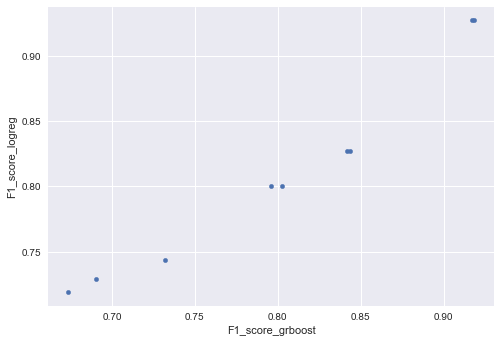

In [33]:
clasif_compare.plot.scatter("F1_score_grboost","F1_score_logreg")

<AxesSubplot:xlabel='Criterio', ylabel='value'>

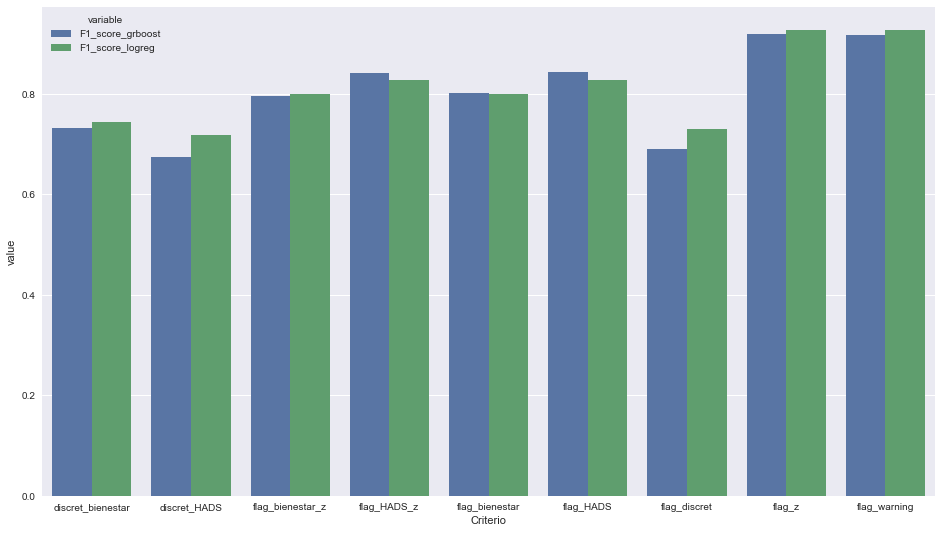

In [42]:
plt.figure(figsize=(16,9))
sns.barplot(x="Criterio", y="value", hue="variable",
            data=clasif_compare.melt(id_vars="Criterio" ,value_vars=["F1_score_grboost","F1_score_logreg"]))